In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
drive.mount('/drive/')



Drive already mounted at /drive/; to attempt to forcibly remount, call drive.mount("/drive/", force_remount=True).


In [211]:
os.chdir('/drive/MyDrive/Analyse_exploratoire')

In [212]:
ls


 analyse_exploratoire.ipynb   Coaches.xlsx           Teams.gsheet
 athlete_events.csv           EntriesGender.gsheet   Teams.xlsx
'Athletes (1).gsheet'         EntriesGender.xlsx    'Tokyo 2021 dataset.csv'
 Athletes.gsheet              Medals.gsheet         'Tokyo 2021 dataset.gsheet'
 Athletes.xlsx                Medals.xlsx
 Coaches.gsheet               noc_regions.csv


In [213]:
#Document CSV et XLSX

df_AthelteEvents = pd.read_csv('athlete_events.csv')
df_NocRegions = pd.read_csv('noc_regions.csv')
df_TokyoDataset = pd.read_csv('Tokyo 2021 dataset.csv')

df_Atheltes = pd.read_excel('Athletes.xlsx')
df_Coaches = pd.read_excel('Coaches.xlsx')
df_EntriesGender = pd.read_excel('EntriesGender.xlsx')
df_Medals = pd.read_excel('Medals.xlsx')
df_Teams = pd.read_excel('Teams.xlsx')

In [214]:
df_AthelteEvents.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [215]:
df_Atheltes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [216]:
df_NocRegions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [217]:
df_TokyoDataset.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


In [218]:
df_Coaches.head()

,Name,NOC,Discipline,Event
0,ABDELMAGID Wael,Egypt,Football,NaN
1,ABE Junya,Japan,Volleyball,NaN
2,ABE Katsuhiko,Japan,Basketball,NaN
3,ADAMA Cherif,Côte d'Ivoire,Football,NaN
4,AGEBA Yuya,Japan,Volleyball,NaN


In [219]:
df_Medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,People's Republic of China,32,22,16,70,2
1,2,United States of America,25,30,22,77,1
2,3,Japan,21,7,12,40,5
3,4,Great Britain,15,18,15,48,4
4,5,Australia,15,4,17,36,6


In [220]:
df_EntriesGender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [221]:
df_Teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


**ON COMMENCE L ANALYSE DES ATHLETES EVENTS**

In [222]:
#df_AthelteEvents.head()

In [223]:
df_AE1 =  df_AthelteEvents[df_AthelteEvents['Season'] == 'Summer']

In [224]:
#df_AE1.head()

In [407]:
df_AE2 = df_AE1.drop(['Sport','Sex','Age','Height','Weight','ID','Games'],axis = 1)

In [408]:
df_AE2

,Name,Team,NOC,Year,Season,City,Event,Medal
0,A Dijiang,China,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,NaN
1,A Lamusi,China,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,Denmark,DEN,1920,Summer,Antwerpen,Football Men's Football,NaN
3,Edgar Lindenau Aabye,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
26,"Cornelia ""Cor"" Aalten (-Strannood)",Netherlands,NED,1932,Summer,Los Angeles,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...
271106,Fernando scar Zylberberg,Argentina,ARG,2004,Summer,Athina,Hockey Men's Hockey,NaN
271107,"James Francis ""Jim"" Zylker",United States,USA,1972,Summer,Munich,Football Men's Football,NaN
271108,Aleksandr Viktorovich Zyuzin,Russia,RUS,2000,Summer,Sydney,Rowing Men's Lightweight Coxless Fours,NaN
271109,Aleksandr Viktorovich Zyuzin,Russia,RUS,2004,Summer,Athina,Rowing Men's Lightweight Coxless Fours,NaN


In [409]:
df_AE2['City'].unique()


array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [410]:
df_AE2[df_AE2["Team"] == 'England'].head(1)

,Name,Team,NOC,Year,Season,City,Event,Medal
49593,"Charles Frederick ""Charlie"" Davey",England,GBR,1912,Summer,Stockholm,"Cycling Men's Road Race, Individual",NaN


In [411]:
def tri(x):
  if x == 'Barcelona':
    y = ('ESP')
  elif x =='London':
    y = ('GBR')
  elif x =='Antwerpen':
    y = ('BEL')
  elif x =='Paris':
    y = ('FRA')
  elif x == 'Los Angeles':
    y = ('USA')
  elif x == 'Helsinki':
    y = ('FIN')
  elif x == 'Sydney':
    y = ('AUS')
  elif x == 'Atlanta':
    y = ('USA')
  elif x == 'Stockholm':
    y = ('SWE')
  elif x == 'Beijing':
    y = ('CHN')
  elif x == 'Rio de Janeiro':
    y = ('BRA')
  elif x ==  'Athina':
    y = ('GRE')
  elif x == 'Mexico City':
    y = ('MEX')
  elif x == 'Munich':
    y = ('GER')
  elif x == 'Seoul':
    y = ('KOR')
  elif x == 'Berlin':
    y = ('GER')
  elif x ==  'Melbourne':
    y = ('AUS')
  elif x ==  'Roma':
    y = ('ITA')
  elif x ==  'Amsterdam':
    y = ('NED')
  elif x ==  'Montreal':
    y = ('AUS')
  elif x ==  'Moskva':
    y = ('RUS')
  elif x ==  'Tokyo':
    y = ('JPN')
  elif x ==  'St. Louis':
    y = ('USA')
  
  return y

In [412]:
new_colo = []
for i in range(222552):
  new_colo.append(tri(df_AE2["City"].values[i]))

print(new_colo)

['ESP', 'GBR', 'BEL', 'FRA', 'USA', 'USA', 'FIN', 'AUS', 'USA', 'AUS', 'SWE', 'SWE', 'BEL', 'BEL', 'FRA', 'GBR', 'GBR', 'GBR', 'GBR', 'GBR', 'GBR', 'GBR', 'GBR', 'FIN', 'FIN', 'FIN', 'FIN', 'FIN', 'FIN', 'FIN', 'FIN', 'AUS', 'GBR', 'CHN', 'BRA', 'AUS', 'GRE', 'BEL', 'USA', 'MEX', 'GER', 'KOR', 'USA', 'AUS', 'GER', 'SWE', 'ESP', 'USA', 'GBR', 'USA', 'USA', 'USA', 'AUS', 'AUS', 'USA', 'BEL', 'SWE', 'SWE', 'SWE', 'BEL', 'SWE', 'ESP', 'GER', 'GER', 'GBR', 'FIN', 'AUS', 'ITA', 'BEL', 'BEL', 'FRA', 'NED', 'GBR', 'GRE', 'CHN', 'ESP', 'USA', 'BRA', 'BRA', 'BRA', 'BRA', 'BRA', 'BRA', 'AUS', 'AUS', 'GBR', 'BRA', 'AUS', 'AUS', 'KOR', 'FRA', 'FRA', 'AUS', 'ITA', 'ITA', 'ITA', 'BRA', 'CHN', 'ESP', 'BRA', 'GER', 'CHN', 'GBR', 'AUS', 'AUS', 'CHN', 'AUS', 'ESP', 'ESP', 'GRE', 'CHN', 'CHN', 'GBR', 'BRA', 'GBR', 'GRE', 'AUS', 'MEX', 'USA', 'FRA', 'USA', 'GRE', 'AUS', 'ESP', 'GRE', 'AUS', 'RUS', 'USA', 'RUS', 'USA', 'JPN', 'RUS', 'USA', 'GRE', 'GRE', 'GBR', 'CHN', 'GRE', 'CHN', 'USA', 'GRE', 'GRE', 'AUS'

In [413]:
#df_AE2.insert('City_Contry',column = 6, value =new_colo )

In [414]:
#df_AE2.apply(tri(df_AE2["City"]))
df_AE2["City_Country"] = df_AE2["City"].apply(tri)



In [415]:
#df_AE2[df_AE2["Year"] >= 2015]

In [416]:
df_AE2["Together"] = (df_AE2["NOC"] == df_AE2["City_Country"])

In [417]:
df_AE2.dropna(inplace = True)

In [418]:
df_AE2


,Name,Team,NOC,Year,Season,City,Event,Medal,City_Country,Together
3,Edgar Lindenau Aabye,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold,FRA,False
37,Arvo Ossian Aaltonen,Finland,FIN,1920,Summer,Antwerpen,Swimming Men's 200 metres Breaststroke,Bronze,BEL,False
38,Arvo Ossian Aaltonen,Finland,FIN,1920,Summer,Antwerpen,Swimming Men's 400 metres Breaststroke,Bronze,BEL,False
41,Paavo Johannes Aaltonen,Finland,FIN,1948,Summer,London,Gymnastics Men's Individual All-Around,Bronze,GBR,False
42,Paavo Johannes Aaltonen,Finland,FIN,1948,Summer,London,Gymnastics Men's Team All-Around,Gold,GBR,False
...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),Soviet Union,URS,1956,Summer,Melbourne,Athletics Women's Shot Put,Silver,AUS,False
271080,Galina Ivanovna Zybina (-Fyodorova),Soviet Union,URS,1964,Summer,Tokyo,Athletics Women's Shot Put,Bronze,JPN,False
271082,Bogusaw Zych,Poland,POL,1980,Summer,Moskva,"Fencing Men's Foil, Team",Bronze,RUS,False
271102,Olesya Nikolayevna Zykina,Russia,RUS,2000,Summer,Sydney,Athletics Women's 4 x 400 metres Relay,Bronze,AUS,False


In [419]:
#df_AE2[df_AE2["Together"] == False]

In [420]:
df_AE2["Gold"] = (df_AE2["Medal"] == "Gold")
df_AE2["Silver"] = (df_AE2["Medal"] == "Silver")
df_AE2["Bronze"] = (df_AE2["Medal"] == "Bronze")

In [421]:
#df_AE2["Gold","NOC","Year"].groupby(["NOC","Year"]).sum()

In [422]:
# t test 
# Graphe par pays boite a moustache

In [423]:
def contage(x):
  y = 0
  if x == 'Gold':
    y = 1
  elif x == 'Silver':
    y = 1
  elif x =='Bronze':
    y = 1
  return y

In [427]:
df_JO = df_AE2[['Name','NOC','Year','Together','Medal']]
df_JO.dropna(inplace=True)
df_JO['Points'] = df_JO['Medal'].apply(contage)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [428]:
df_JO


,Name,NOC,Year,Together,Medal,Points
3,Edgar Lindenau Aabye,DEN,1900,False,Gold,1
37,Arvo Ossian Aaltonen,FIN,1920,False,Bronze,1
38,Arvo Ossian Aaltonen,FIN,1920,False,Bronze,1
41,Paavo Johannes Aaltonen,FIN,1948,False,Bronze,1
42,Paavo Johannes Aaltonen,FIN,1948,False,Gold,1
...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),URS,1956,False,Silver,1
271080,Galina Ivanovna Zybina (-Fyodorova),URS,1964,False,Bronze,1
271082,Bogusaw Zych,POL,1980,False,Bronze,1
271102,Olesya Nikolayevna Zykina,RUS,2000,False,Bronze,1


In [436]:
df_relou = df_JO[df_JO['NOC'] =='FRA']
df_relou[df_relou["Together"] == True]
df_relou.groupby('Name').nunique()

,NOC,Year,Together,Medal,Points
Name,,,,,
A. Albert,1,1,1,1,1
A. Dubois,1,1,1,2,1
"Abdelghani ""Ghani"" Yalouz",1,1,1,1,1
"Abdoulaye ""Abdou"" Sye Papa",1,1,1,1,1
Achille Charles Marcel Tribouillet,1,1,1,1,1
...,...,...,...,...,...
ric Quintin,1,1,1,1,1
ric Renaud,1,1,1,1,1
tienne Bonnes,1,1,1,1,1


In [384]:
df_JO = df_JO[df_JO['NOC'] == 'USA']

#df_JO_H = df_JO[df_JO['Together'] == True].drop(['NOC','Year','Medal'],axis = 1)
#df_JO_NH = df_JO[df_JO['Together'] == False].drop(['NOC','Year','Medal'],axis = 1)

#df_concact = pd.concat([df_JO_H,df_JO_NH])

In [385]:
#sns.boxplot(data = df_concact , x = 'Together' , y = 'Points')

In [386]:
#df_JO_cool = df_JO_A.drop(['NOC','Medal'],axis = 1)

In [387]:

#df_JO_cool = df_JO_cool.groupby(['Together','Year'], as_index= False).sum()

In [388]:
#sns.boxplot(data = df_JO_cool , x = 'Together' , y = 'Points')

In [389]:
df_JO_Countries = df_JO.drop(['Medal'],axis = 1)

In [390]:
df_JO_Countries[df_JO_Countries['NOC'] == 'France']

,NOC,Year,Together,Points


In [391]:
df_JO_Countries = df_JO_Countries.groupby(['Together','Year','NOC'], as_index= False).sum()

In [406]:
df_JO_Countries[df_JO_Countries['Together'] == True]

,Together,Year,NOC,Points
1248,True,1896,GRE,48
1249,True,1900,FRA,235
1250,True,1904,USA,394
1251,True,1906,GRE,102
1252,True,1908,GBR,368
1253,True,1912,SWE,190
1254,True,1920,BEL,188
1255,True,1924,FRA,110
1256,True,1928,NED,57
1257,True,1932,USA,189


In [398]:
countries = ['ESP', 'GBR', 'BEL', 'FRA', 'USA', 'FIN','AUS','SWE', 'CHN', 'BRA', 'GRE', 'MEX','KOR', 'GER', 'ITA', 'NED','RUS','JPN']


In [468]:
df_JO_Countries_H = df_JO_Countries[df_JO_Countries['Together'] == True]
df_JO_Countries_NH =  df_JO_Countries[df_JO_Countries['Together'] == False]
df_JO_Countries

for i in countries : 

  print( "{} : {} : {}  ".format(i,e,np.percentile(np.where(df_JO_Countries['NOC'] == i ),e)))
  print( "{} : {} : {}  ".format(i,e,np.percentile(np.where(df_JO_Countries['NOC'] == i ),e)))
  print("")

ESP : [75, 80, 95] : [ 902.5  972.  1193.4]  
ESP : [75, 80, 95] : [ 902.5  972.  1193.4]  

GBR : [75, 80, 95] : [ 788.   899.6 1256.2]  
GBR : [75, 80, 95] : [ 788.   899.6 1256.2]  

BEL : [75, 80, 95] : [ 739.   833.6 1145.5]  
BEL : [75, 80, 95] : [ 739.   833.6 1145.5]  

FRA : [75, 80, 95] : [ 787.   898.6 1225.4]  
FRA : [75, 80, 95] : [ 787.   898.6 1225.4]  

USA : [75, 80, 95] : [1011.  1125.6 1263.5]  
USA : [75, 80, 95] : [1011.  1125.6 1263.5]  

FIN : [75, 80, 95] : [ 769.  866. 1168.]  
FIN : [75, 80, 95] : [ 769.  866. 1168.]  

AUS : [75, 80, 95] : [ 844.5  982.8 1264.5]  
AUS : [75, 80, 95] : [ 844.5  982.8 1264.5]  

SWE : [75, 80, 95] : [ 850.25  953.6  1246.7 ]  
SWE : [75, 80, 95] : [ 850.25  953.6  1246.7 ]  

CHN : [75, 80, 95] : [1093.  1126.2 1234.2]  
CHN : [75, 80, 95] : [1093.  1126.2 1234.2]  

BRA : [75, 80, 95] : [ 812.5  881.8 1107.6]  
BRA : [75, 80, 95] : [ 812.5  881.8 1107.6]  

GRE : [75, 80, 95] : [1025. 1110. 1251.]  
GRE : [75, 80, 95] : [1025.

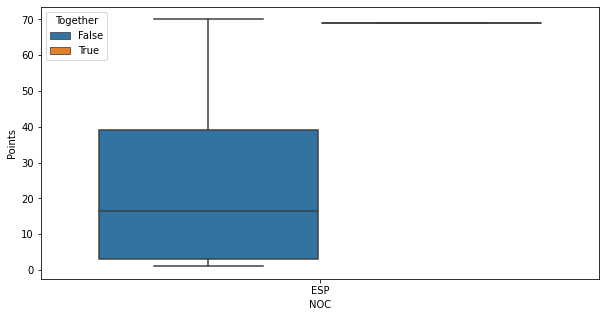

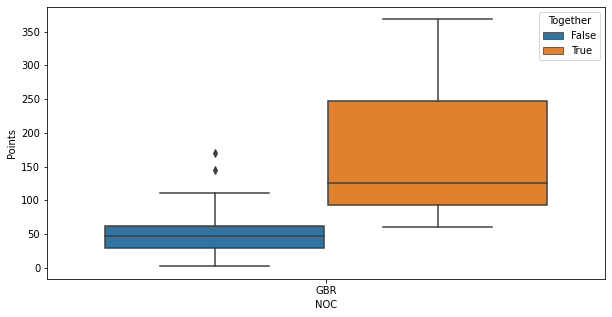

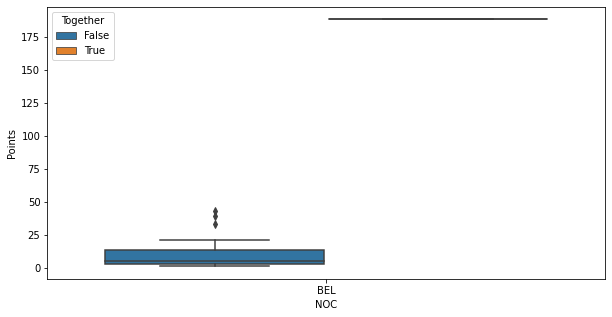

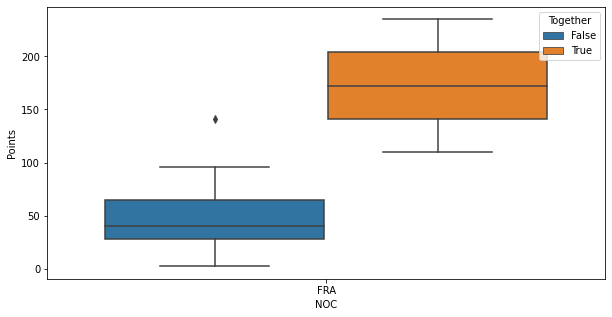

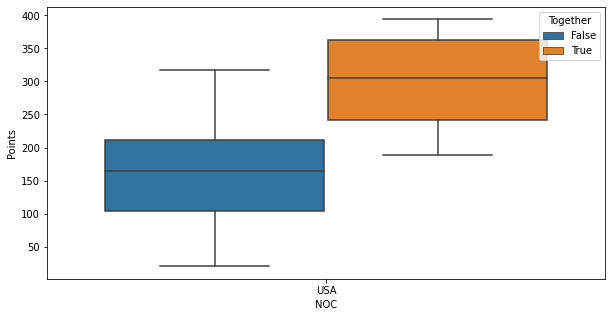

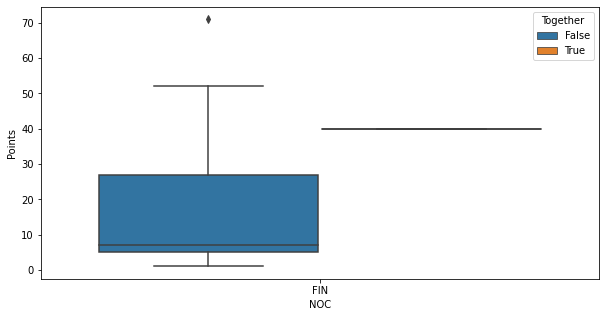

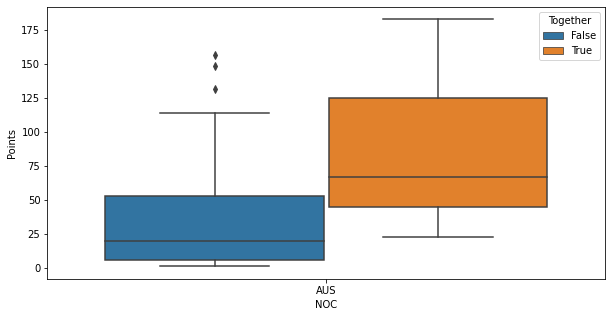

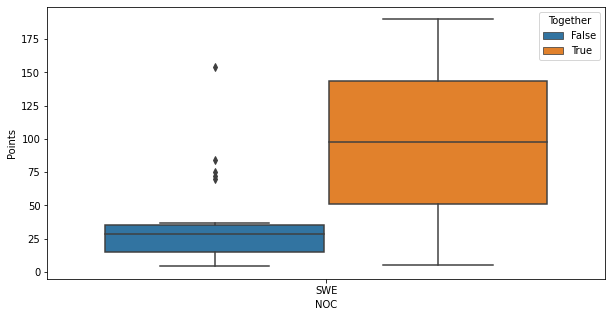

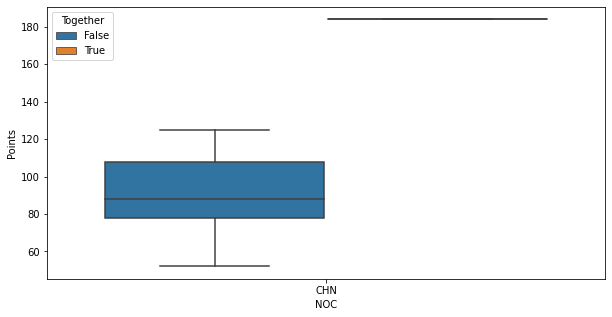

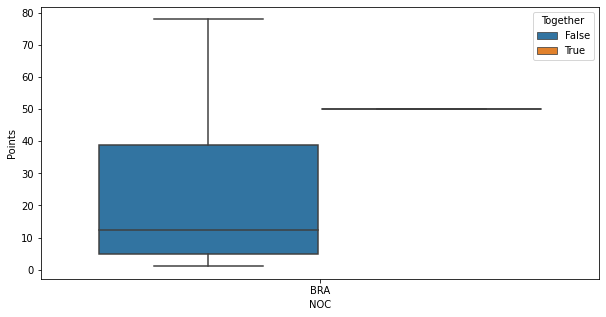

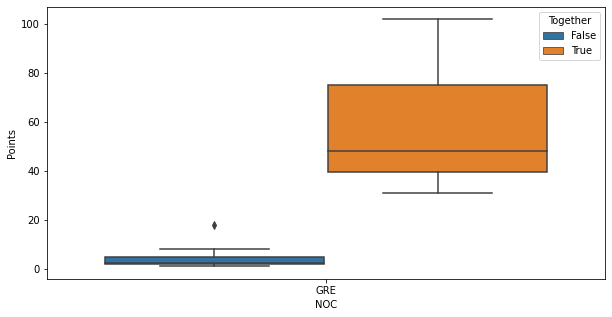

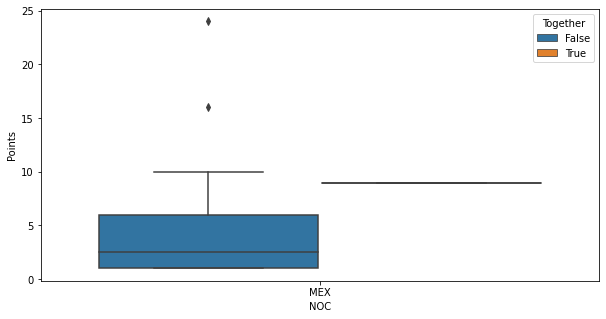

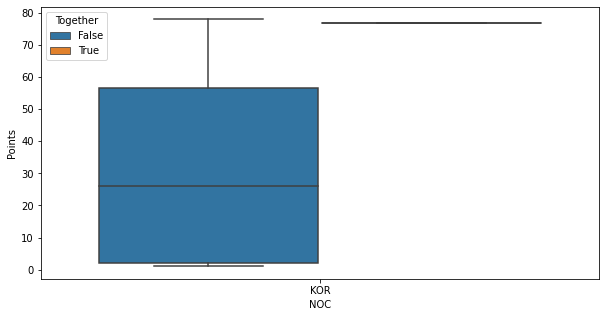

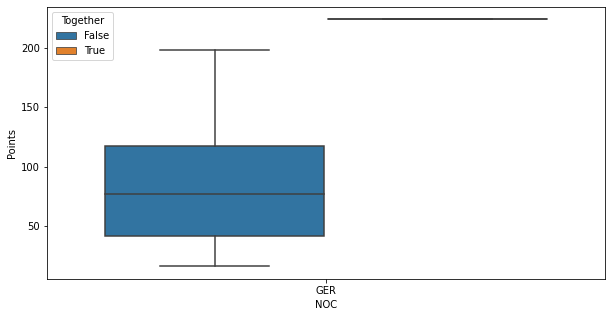

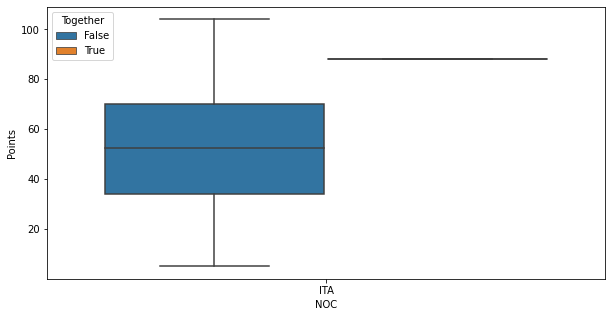

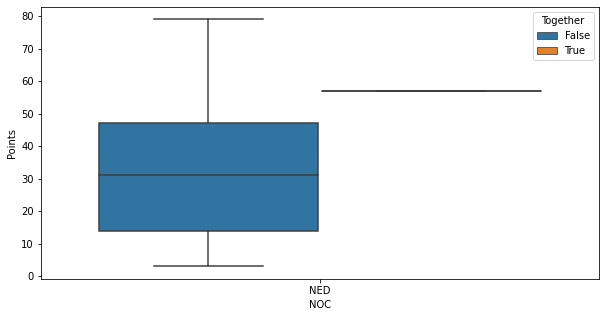

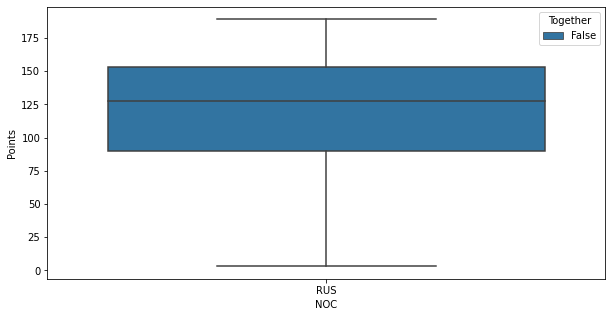

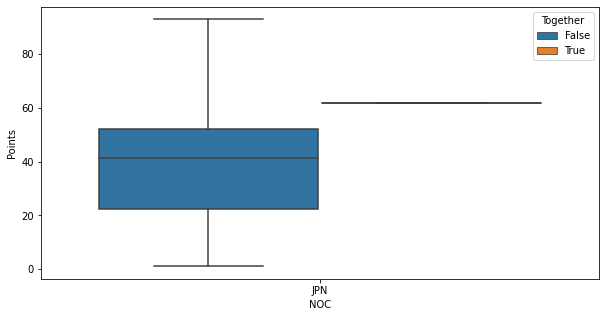

In [456]:
 for i in countries : 


   plt.figure(figsize = (10,5))
   sns.boxplot(data = df_JO_Countries[df_JO_Countries["NOC"] == i] , x = 'NOC', y = 'Points',hue = 'Together')

''

In [342]:
df_compare = pd.DataFrame()

In [343]:
#DATA_SET TOKYO2021


In [344]:
 df_TDS = df_TokyoDataset.sort_values('Total',ascending = False).head(10)
 df_TDS

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
4,5,ROC,20,28,23,71,3,ROC
3,4,Great Britain,22,21,22,65,4,GBR
2,3,Japan,27,14,17,58,5,JPN
5,6,Australia,17,7,22,46,6,AUS
9,10,Italy,10,10,20,40,7,ITA
8,9,Germany,10,11,16,37,8,GER
6,7,Netherlands,10,12,14,36,9,NED
7,8,France,10,12,11,33,10,FRA


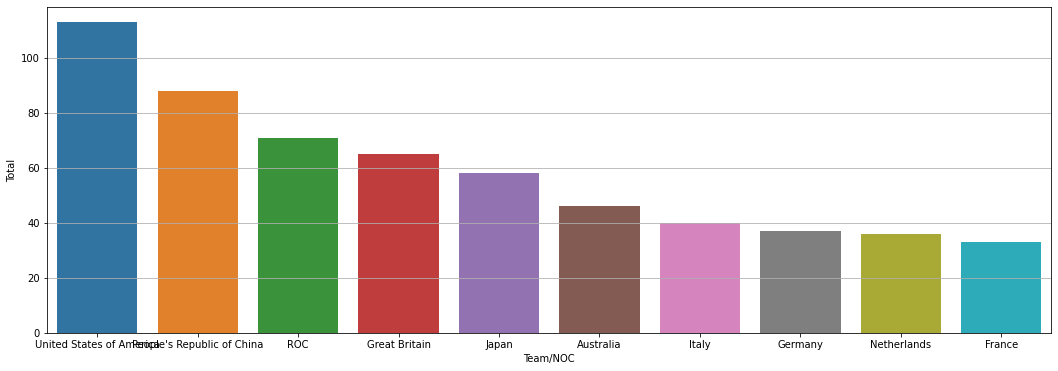

In [345]:
plt.figure(figsize = (18,6))
sns.barplot(x="Team/NOC",y="Total",data=df_TDS)
plt.grid(axis = 'y')
plt.show()